In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

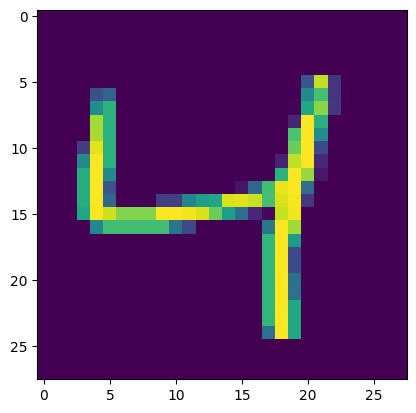

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 4ms/step - loss: 0.2782 - accuracy: 0.9180 - val_loss: 0.1373 - val_accuracy: 0.9613
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1182 - accuracy: 0.9651 - val_loss: 0.1086 - val_accuracy: 0.9668
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0823 - accuracy: 0.9746 - val_loss: 0.1268 - val_accuracy: 0.9625
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0929 - val_accuracy: 0.9737
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.1070 - val_accuracy: 0.9715
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.1149 - val_accuracy: 0.9682
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0306 - accuracy: 0.9897 - val_loss: 0.1036 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9748

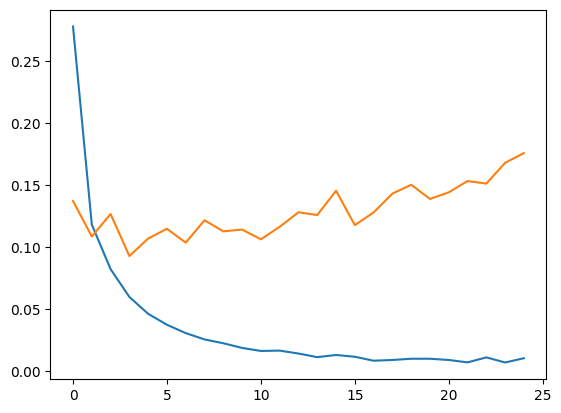

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

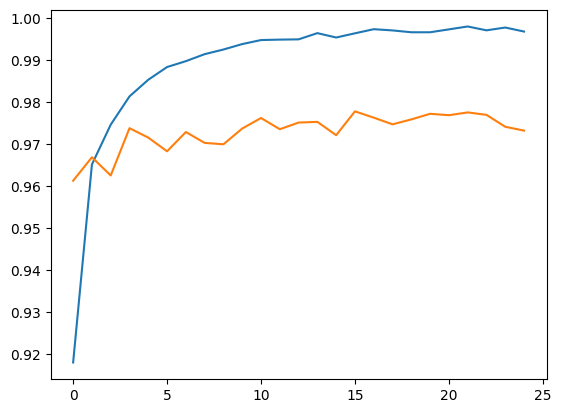

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

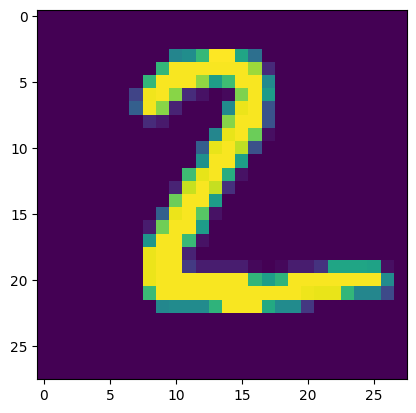

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 34ms/step


array([2], dtype=int64)

In [ ]:
model.save('mnist_model.h5')

In [ ]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, x_test), (y_train, y_test) = keras.datasets.mnist.load_datasets()

AttributeError: module 'keras.api._v2.keras.datasets.mnist' has no attribute 'load_datasets'

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model = keras.models.load_model('mnist_model.h5')
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_test = X_test / 255.0
X_test_flattened = X_test.reshape(len(X_test), 28*28)
predictions = model.predict(X_test_flattened)
print(np.argmax(predictions[:5], axis=1))  # Predict the class (0-9)


313/313 [==============================] - 1s 2ms/step
[7 2 1 0 4]


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.models.load_model('mnist_model.h5')
image = cv2.imread("./ProcessImages/3_AllBitsFromTableStore/3.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (28, 28))

normalized_image = resized_image / 255.0
input_image = normalized_image.reshape(1, 28*28)
prediction = model.predict(input_image)
predicted_class = np.argmax(prediction)
print("Predicted Class:", predicted_class)

In [2]:
# import cv2
# # from paddleocr import PaddleOCR
# # ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Use 'en' for English language
# img = cv2.imread("./ProcessImages/3_AllBitsFromTableStore/1.jpg", cv2.IMREAD_GRAYSCALE)

# _, img_thresh = cv2.threshold(img, 75, 255, cv2.THRESH_BINARY_INV)

# cv2.imshow("_", img_thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # result = ocr.ocr(img)
# # print(result)
# # if result and len(result[0]) > 1:
# #     digit_text = result[0][1][0]  # result[0] is the first detected line, [1][0] is the text
# #     print("Detected text:", digit_text)
# # else:
# #     print("No text detected")